In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from utils_data_structures import col_prefixes

In [2]:
grouped_df = pd.read_csv('sorare_data/large_grouped_sorare_data.csv')

grouped_df = grouped_df.fillna(0.0)

print(grouped_df['So_5_Scores_9'].isna().sum())

0


In [3]:
# get dummies for current club
# processed_df = pd.get_dummies(grouped_df, columns=['Current_Club'])
processed_df = grouped_df.drop(columns=['Current_Club'])
le = LabelEncoder()
processed_df['Position_Encoded'] = le.fit_transform(processed_df['Position'])

columns_to_drop = ['Display_Name', 'First_Name','Last_Name','Player_Number', 'Position']
processed_df = processed_df.drop(columns=columns_to_drop)

processed_df.fillna(0.0)

# pd.set_option('display.max_columns', None)
processed_df.dtypes.value_counts()

float64    308
int64        4
int32        1
Name: count, dtype: int64

In [4]:
# Create X and y and split into training and testing sets
target_column = 'So_5_Scores_9'
columns_to_drop = [f'{col}_9' for col in col_prefixes]

X = processed_df.drop(columns=columns_to_drop)
y = processed_df[target_column]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Best model used 2 folds with MSE: 257.9460061138345 | rmse: 16.060697560001387
# Best alpha: 0.05
# Best l1_ratio: 0.9

# Initialize
elastic_model = ElasticNet(alpha=0.05, l1_ratio=0.9, random_state=42)

# Train the model
elastic_model.fit(X_train, y_train)

# Make predictions
y_pred = elastic_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 16.065328638377995


c:\Users\mttca\nwuai\course_materials\class_work\projects\Project_2\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.295e+06, tolerance: 7.584e+02
  model = cd_fast.enet_coordinate_descent(


In [9]:

best_model = None
best_cv = None
best_mse = 100000
best_rmse = 100000

alpha_numbers = np.arange(0.05, 1, 0.05)
alpha_numbers = np.arange(0.001, 0.5, 0.05)
alphas = alpha_numbers.tolist()

l1_ratio_numbers = np.arange(0.1, 1, 0.1)
l1_ratios = l1_ratio_numbers.tolist()

for cv in range(2, 4):
    print(f"Testing ElasticNetCV with {cv} folds...")
    model_cv = ElasticNetCV(
        alphas=alphas,        # Range of alpha values to test
        l1_ratio=l1_ratios,       # Range of l1_ratio values to test
        cv=cv,                           # Number of cross-validation folds
        random_state=42,
        n_jobs=-1,
    )

    # Fit the model
    model_cv.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model_cv.predict(X_test)
    
    # Calculate mean squared error
    y_pred_clipped = np.clip(y_pred, 0, 100)
    mse = mean_squared_error(y_test, y_pred_clipped)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error for cv={cv}: {rmse}")
    
    # Save the best model based on MSE
    if mse < best_mse:
        best_mse = mse
        best_rmse = rmse
        best_cv = cv
        best_model = model_cv

# Output the best model and its performance
print(f"\nBest model used {best_cv} folds with MSE: {best_mse} | rmse: {best_rmse}")
print(f"Best alpha: {best_model.alpha_}")
print(f"Best l1_ratio: {best_model.l1_ratio_}")

Testing ElasticNetCV with 2 folds...


c:\Users\mttca\nwuai\course_materials\class_work\projects\Project_2\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1548.4626830685884, tolerance: 373.57883444977506
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mttca\nwuai\course_materials\class_work\projects\Project_2\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23885.46118839062, tolerance: 384.75339284061397
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mttca\nwuai\course_materials\class_work\projects\Project_2\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150541.29583944252, tolerance: 373.57883

Root Mean Squared Error for cv=2: 16.06168172494895
Testing ElasticNetCV with 3 folds...


c:\Users\mttca\nwuai\course_materials\class_work\projects\Project_2\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783808.3590927925, tolerance: 501.4610329863058
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mttca\nwuai\course_materials\class_work\projects\Project_2\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 621553.9474304816, tolerance: 507.76154604296136
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mttca\nwuai\course_materials\class_work\projects\Project_2\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16227.733877073508, tolerance: 507.4973511

Root Mean Squared Error for cv=3: 16.092743469504466

Best model used 2 folds with MSE: 257.97761983355906 | rmse: 16.06168172494895
Best alpha: 0.051000000000000004
Best l1_ratio: 0.9


c:\Users\mttca\nwuai\course_materials\class_work\projects\Project_2\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.100e+06, tolerance: 7.584e+02
  model = cd_fast.enet_coordinate_descent(


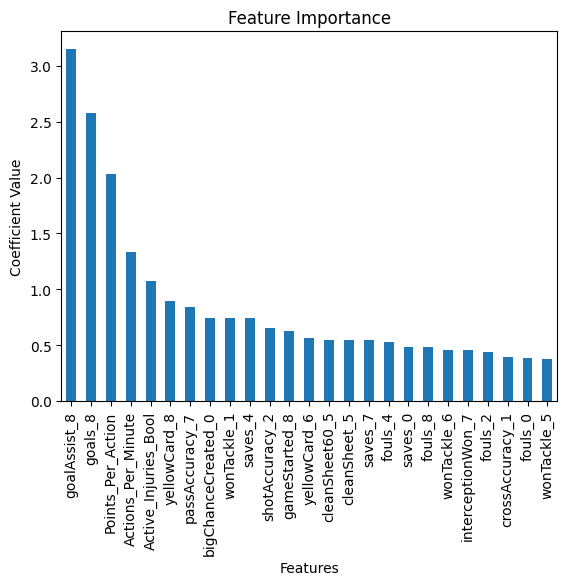

In [12]:
feature_importance = pd.Series(best_model.coef_, index=X_train.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False).head(25)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()